In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql import functions as F
# File location and type
file_location = "/FileStore/tables/WeatherEvents_Jan2016_Dec2021.csv"




# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.csv(file_location, header = True, inferSchema = True)
df.printSchema()

#Smaller dataframe to work with
df_x = df.limit(10000)
df_y = df.limit(50000)

#Caching frequently used dfs
df_x.cache()
df_y.cache()

root
 |-- EventId: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Severity: string (nullable = true)
 |-- StartTime(UTC): timestamp (nullable = true)
 |-- EndTime(UTC): timestamp (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- TimeZone: string (nullable = true)
 |-- AirportCode: string (nullable = true)
 |-- LocationLat: double (nullable = true)
 |-- LocationLng: double (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZipCode: integer (nullable = true)

Out[2]: DataFrame[EventId: string, Type: string, Severity: string, StartTime(UTC): timestamp, EndTime(UTC): timestamp, Precipitation(in): double, TimeZone: string, AirportCode: string, LocationLat: double, LocationLng: double, City: string, County: string, State: string, ZipCode: int]

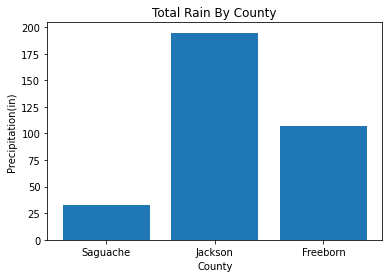

In [0]:
#Bar Plot 


# Convert PySpark DataFrame to pandas DataFrame. Sum the precipitation by county
pandas_df = df_x.groupBy('County').sum('Precipitation(in)').toPandas()


# Create a bar plot using Matplotlib
plt.bar(pandas_df['County'], pandas_df['sum(Precipitation(in))'])
plt.xlabel('County')
plt.ylabel('Precipitation(in)')
plt.title('Total Rain By County')
plt.show()

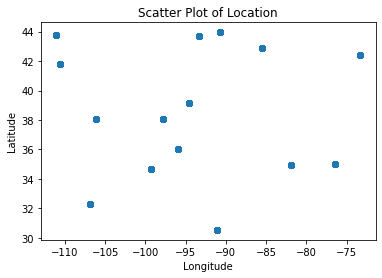

In [0]:
# Convert PySpark DataFrame to pandas DataFrame
pandas_df = df_y.select('LocationLat', 'LocationLng').toPandas()

# Create the scatter plot
plt.scatter(pandas_df['LocationLng'], pandas_df['LocationLat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Location')
plt.show()

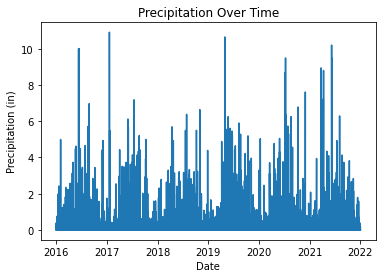

In [0]:
# Convert PySpark DataFrame to pandas DataFrame
pandas_df = df_y.select('StartTime(UTC)', 'Precipitation(in)').toPandas()

# Sort the DataFrame by StartTime(UTC)
pandas_df.sort_values(by='StartTime(UTC)', inplace=True)

# Create the line plot
plt.plot(pandas_df['StartTime(UTC)'], pandas_df['Precipitation(in)'])
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation Over Time')

plt.show()


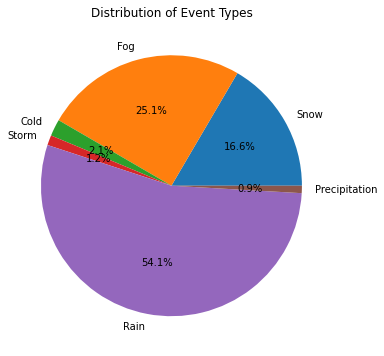

In [0]:
# Pie Chart - Distribution of Event Types
event_counts = df_x.groupby('Type').count().select('Type', 'count').toPandas()

plt.figure(figsize=(8, 6))
plt.pie(event_counts['count'], labels=event_counts['Type'], autopct='%1.1f%%')
plt.title('Distribution of Event Types')
plt.show()

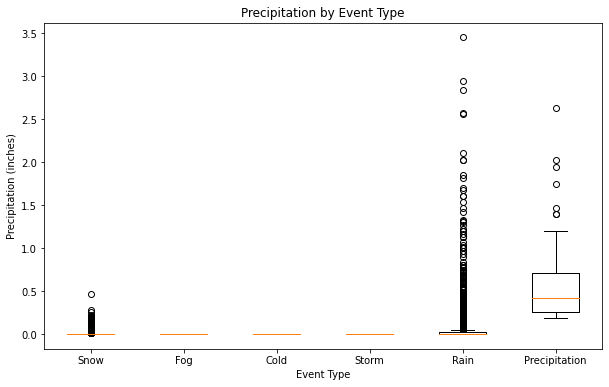

In [0]:
# Box Plot - Precipitation by Event Type
precipitation_by_type = df_x.groupBy('Type').agg(F.collect_list('Precipitation(in)').alias('precipitation_list')).toPandas()

plt.figure(figsize=(10, 6))
plt.boxplot(precipitation_by_type['precipitation_list'], labels=precipitation_by_type['Type'])
plt.xlabel('Event Type')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation by Event Type')
plt.show()